In [ ]:
import keras
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [ ]:
kernel_initializer = ki = 'he_normal'


layers = [
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu', kernel_initializer=ki),
  tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=ki)
]


learningRate = 0.0001
epochs = 20
batch_size = 20


from keras.optimizers import RMSprop

model = keras.models.Sequential(layers)
model.compile(
    optimizer = RMSprop(learningRate),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test,y_test),
)

Epoch 1/20
3000/3000 [==============================] - 13s 4ms/step - loss: 0.5638 - accuracy: 0.8505 - val_loss: 0.3029 - val_accuracy: 0.9158
Epoch 2/20
3000/3000 [==============================] - 15s 5ms/step - loss: 0.2850 - accuracy: 0.9198 - val_loss: 0.2518 - val_accuracy: 0.9279
Epoch 3/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.2414 - accuracy: 0.9317 - val_loss: 0.2190 - val_accuracy: 0.9371
Epoch 4/20
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2116 - accuracy: 0.9399 - val_loss: 0.1974 - val_accuracy: 0.9439
Epoch 5/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1896 - accuracy: 0.9469 - val_loss: 0.1776 - val_accuracy: 0.9486
Epoch 6/20
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1721 - accuracy: 0.9506 - val_loss: 0.1640 - val_accuracy: 0.9517
Epoch 7/20
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1578 - accuracy: 0.9546 - val_loss: 0.1533 - val_accur

Train Loss: 0.08
Test Loss: 0.10



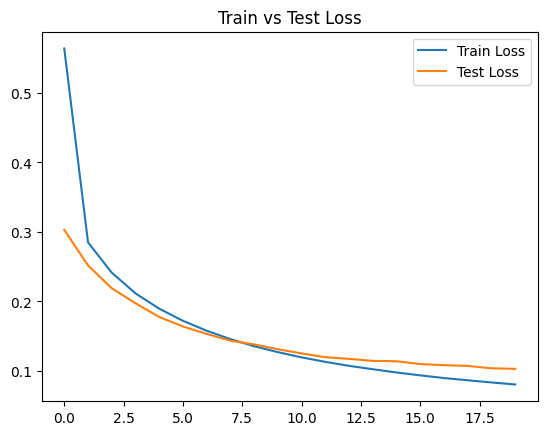

In [ ]:
#@title Train vs Test Loss ⚠️
#@markdown ⚡ Run this cell to compare the train and test loss in each training epoch

plt.title('Train vs Test Loss')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')

trainLoss = history.history['loss'][-1]
testLoss = history.history['val_loss'][-1]
plt.legend()

print(f'Train Loss: {trainLoss:.2f}')
print(f'Test Loss: {testLoss:.2f}')
print()

Train Accuracy: 97.78%
Test Accuracy: 97.08%



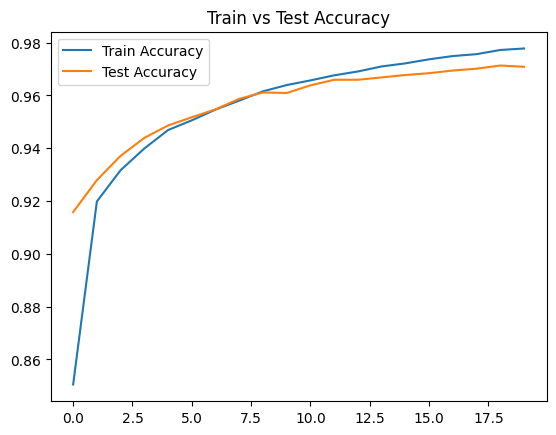

In [ ]:
#@title Train vs Test Accuracy ⚠️
#@markdown ⚡ Run this cell to compare the train and test accuracy in each training epoch

plt.title('Train vs Test Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()

trainAcc = history.history['accuracy'][-1]
testAcc = history.history['val_accuracy'][-1]

print(f'Train Accuracy: {trainAcc*100:.2f}%')
print(f'Test Accuracy: {testAcc*100:.2f}%')
print()

In [ ]:
#@title Load Auxiliar Functions ⚠️
#@markdown ⚡ Run this cell to load all the auxiliar functions

import cv2

from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

MIN_PROBABILITY = 3

def imageToArray(fileName):
  originalImage = cv2.imread(fileName)
  grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  normalizedImage = grayImage / 255
  image = normalizedImage.reshape((28,28))
  return image

def printProbabilities(predictions):
  for i in range(10):
    prob = predictions[0][i] * 100
    if prob > MIN_PROBABILITY:
      message = f'Digit {i}\t{prob:.0f}%'
      print(message)

def predictImages(uploaded):
  for fn in uploaded.keys():
    print(fn)
    image = imageToArray(fn)
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()
    ds = image.reshape((1,28,28))
    prediction = model.predict(ds)
    printProbabilities(prediction)
    print('***********************************')

Saving pixil-frame-0 (9).png to pixil-frame-0 (9).png
Saving pixil-frame-0 (8).png to pixil-frame-0 (8).png
Saving pixil-frame-0 (7).png to pixil-frame-0 (7).png
Saving pixil-frame-0 (6).png to pixil-frame-0 (6).png
Saving pixil-frame-0 (5).png to pixil-frame-0 (5).png
Saving pixil-frame-0 (4).png to pixil-frame-0 (4).png
Saving pixil-frame-0 (3).png to pixil-frame-0 (3).png
Saving pixil-frame-0 (2).png to pixil-frame-0 (2).png
Saving pixil-frame-0 (1).png to pixil-frame-0 (1).png
Saving pixil-frame-0.png to pixil-frame-0 (10).png


_________________________________________________


pixil-frame-0 (9).png


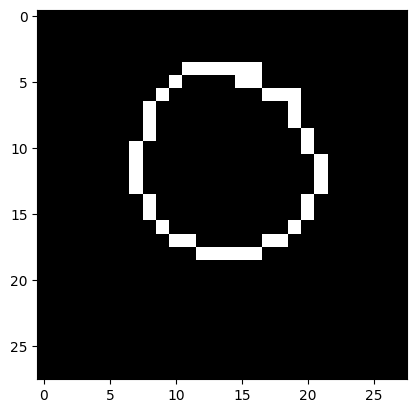

1/1 [==============================] - 0s 20ms/step
Digit 0	7%
Digit 2	6%
Digit 3	5%
Digit 4	53%
Digit 7	4%
Digit 8	7%
Digit 9	15%
***********************************
pixil-frame-0 (8).png


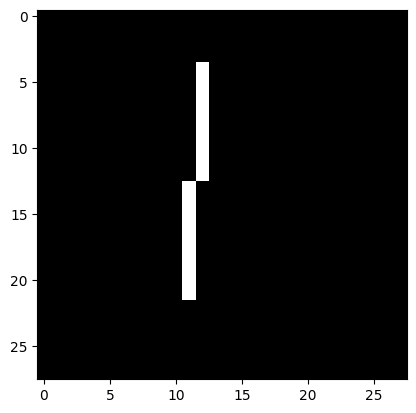

1/1 [==============================] - 0s 17ms/step
Digit 0	13%
Digit 2	7%
Digit 4	18%
Digit 5	15%
Digit 6	36%
Digit 8	9%
***********************************
pixil-frame-0 (7).png


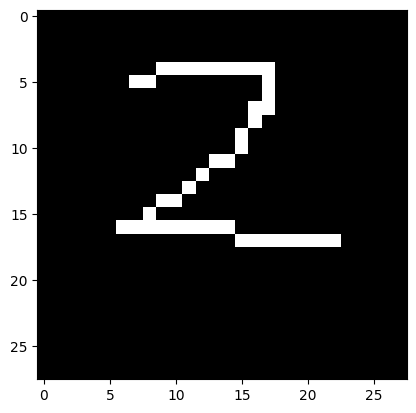

1/1 [==============================] - 0s 22ms/step
Digit 2	71%
Digit 3	14%
Digit 4	15%
***********************************
pixil-frame-0 (6).png


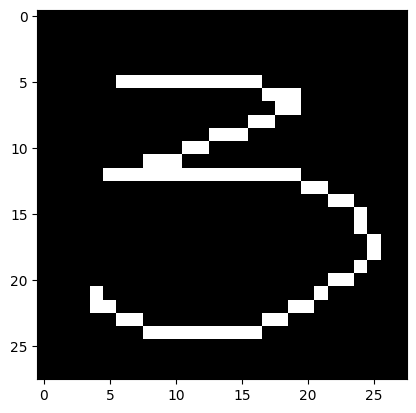

1/1 [==============================] - 0s 20ms/step
Digit 3	4%
Digit 5	94%
***********************************
pixil-frame-0 (5).png


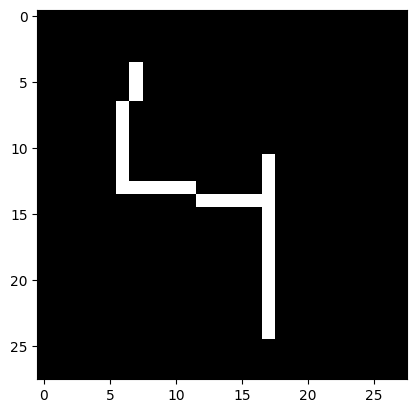

1/1 [==============================] - 0s 19ms/step
Digit 4	94%
Digit 7	3%
***********************************
pixil-frame-0 (4).png


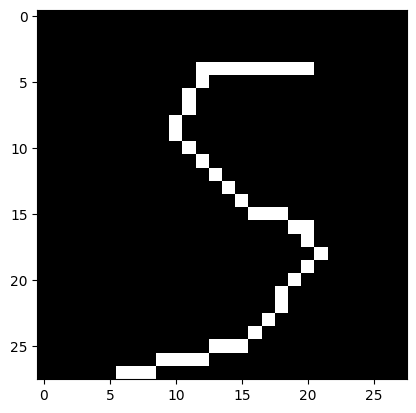

1/1 [==============================] - 0s 20ms/step
Digit 5	89%
Digit 7	7%
Digit 9	3%
***********************************
pixil-frame-0 (3).png


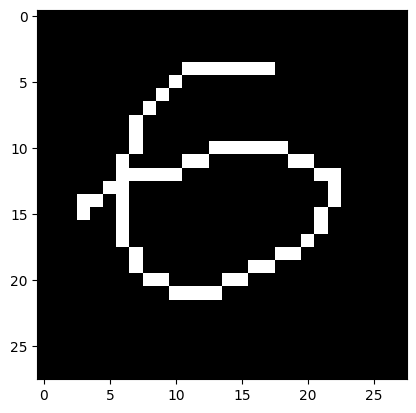

1/1 [==============================] - 0s 19ms/step
Digit 0	27%
Digit 5	61%
Digit 6	7%
***********************************
pixil-frame-0 (2).png


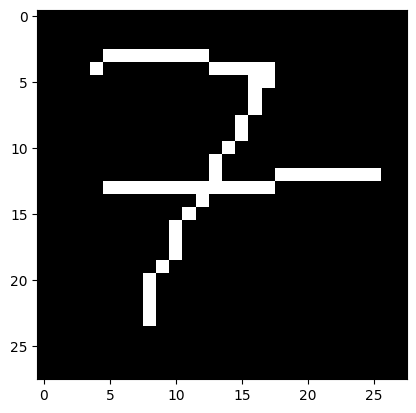

1/1 [==============================] - 0s 19ms/step
Digit 2	4%
Digit 6	96%
***********************************
pixil-frame-0 (1).png


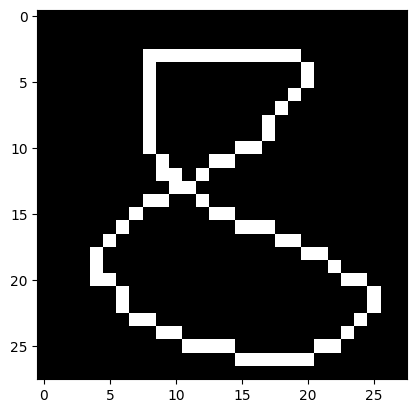

1/1 [==============================] - 0s 20ms/step
Digit 2	66%
Digit 3	18%
Digit 6	7%
Digit 9	8%
***********************************
pixil-frame-0.png


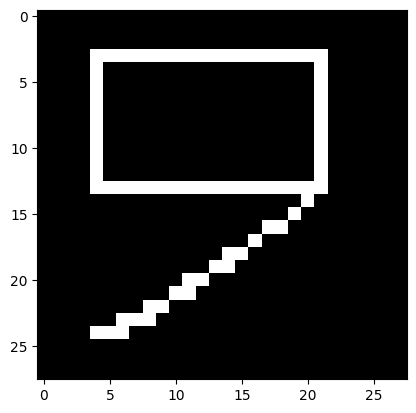

1/1 [==============================] - 0s 22ms/step
Digit 6	100%
***********************************


In [ ]:
uploaded = files.upload()
print('\n')
print('_________________________________________________')
print('\n')
predictImages(uploaded)

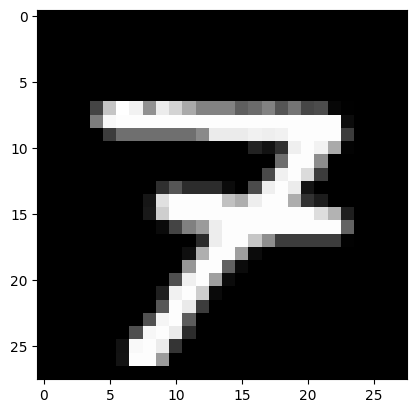

In [ ]:
#@title Explore the dataset
#@markdown Run this cell to visualize a specific sample from Train or Test dataset. You can use this cell to see specific cases from the original dataset. This can be a guide to draw your own digits.

index =  64#@param {type:"integer"}
dataset = "Test" #@param ["Train", "Test"]

if dataset == 'Train':
  data = x_train
else:
  data = x_test

if index >= len(data):
    print(f'Max index is for {dataset} data is {len(data)}')
else:
  sample = data[index]
  plt.imshow(sample, cmap='binary_r')